<a href="https://colab.research.google.com/github/SubhamMohanty187/Data-Science/blob/main/Projects/EDA_for_Haberman's.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###EDA for Haberman's dataset

The various attributes of the data set are:

1.Age of patient at the time of operation(numerical)

2.Patient’s year of operation (year between 1958 to 1970, numerical)

3.Number of positive axillary nodes detected (numerical)

4.Survival status (class attribute) denoted as:

1 — if the patient survived 5 years or longer

2 — if the patient died within 5 years

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
files = files.upload()

Saving haberman.csv to haberman.csv


In [3]:
data = pd.read_csv("haberman.csv")
df = data.copy()
data.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [4]:
print(df.shape)   #There are 306 rows and 4 columns

(306, 4)


###Observation
There are 4 attributes in our dataset.

In [5]:
print(df.info())    #these are the attributes i.e age,year,nodes,status
                    #No NULL values are present

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     306 non-null    int64
 1   year    306 non-null    int64
 2   nodes   306 non-null    int64
 3   status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB
None


In [6]:
df["status"].value_counts()

1    225
2     81
Name: status, dtype: int64

###Observation
This data set is imbalanced

There are only two objects in status attribute i.e 1 and 2

221 patient survived 5 years or longer and 81 patients died within 5 years

##Objective for this EDA
To perform exploratory data analysis to determine whether a patient will survive for 5 year or longer based on the attributes.

In [7]:
df.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


Now we create two new dataframes s1 and s2 for status=1 and status=2
respectively for easier analysis.

In [8]:
s1 = df.loc[df["status"] == 1]    #patient survived 5 years or longer
s2 = df.loc[df["status"] == 2]    #patient died within 5 years

In [9]:
s1.describe()

,age,year,nodes,status
count,225.000000,225.000000,225.000000,225.0
mean,52.017778,62.862222,2.791111,1.0
std,11.012154,3.222915,5.870318,0.0
min,30.000000,58.000000,0.000000,1.0
25%,43.000000,60.000000,0.000000,1.0
50%,52.000000,63.000000,0.000000,1.0
75%,60.000000,66.000000,3.000000,1.0
max,77.000000,69.000000,46.000000,1.0


###Observation for status = 1
The average age of people who survived for 5 years or longer is 52

The average year of operation for theses patients is 1962(or 62)

The average no. of nodes for these patients is 2.79

No patients survived after age of 77

In [10]:
s2.describe()

,age,year,nodes,status
count,81.000000,81.000000,81.000000,81.0
mean,53.679012,62.827160,7.456790,2.0
std,10.167137,3.342118,9.185654,0.0
min,34.000000,58.000000,0.000000,2.0
25%,46.000000,59.000000,1.000000,2.0
50%,53.000000,63.000000,4.000000,2.0
75%,61.000000,65.000000,11.000000,2.0
max,83.000000,69.000000,52.000000,2.0


###Observation for status = 2
The average age of people who died within 5 years is 53

The average year of operation for theses patients is 1962(or 62)

The average no. of nodes for these patients is 7.45


##Univariate Analysis

1-D Scatter Plots

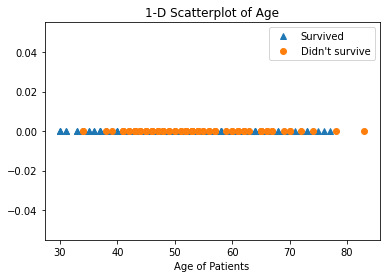

In [20]:
plt.plot(s1["age"],np.zeros_like(s1["age"]), "^", label="Survived")
plt.plot(s2["age"],np.zeros_like(s2["age"]), "o", label="Didn't survive")
plt.xlabel("Age of Patients")
plt.title("1-D Scatterplot of Age")
plt.legend()
plt.show()

###Observation
Patients below the age of 33 years have survived

Patients above the age of 80 years didn't survive

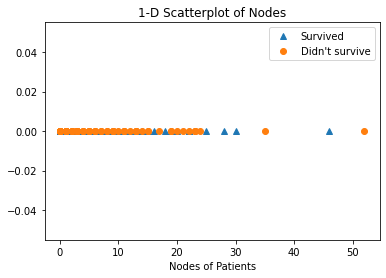

In [23]:
plt.plot(s1["nodes"],np.zeros_like(s1["nodes"]), "^", label="Survived")
plt.plot(s2["nodes"],np.zeros_like(s2["nodes"]), "o", label="Didn't survive")
plt.xlabel("Nodes of Patients")
plt.title("1-D Scatterplot of Nodes")
plt.legend()
plt.show()

###Obseravtion
Patients having lymph nodes greater than 50 didn't survive

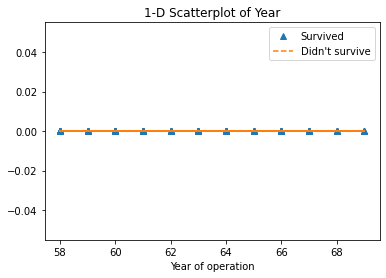

In [30]:
plt.plot(s1["year"],np.zeros_like(s1["year"]), "^", label="Survived")
plt.plot(s2["year"],np.zeros_like(s2["year"]), "--", label="Didn't survive")
plt.xlabel("Year of operation")
plt.title("1-D Scatterplot of Year")
plt.legend()
plt.show()

###Obseravtion
This is highly overalapping data

###PDF & CDF Plots

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


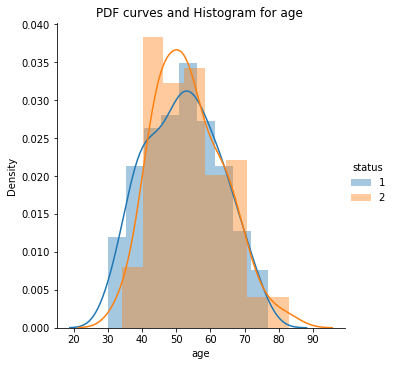

In [27]:
sns.FacetGrid(df, hue="status", size=5) \
   .map(sns.distplot, "age") \
   .add_legend()
plt.title("PDF curves and Histogram for Age ")
plt.show();

###Observation
The patients between age group of 20-40 have more chances of survival.

The patients between age group of 40-60 years have comparatively less chances of survival.

After the age of 60 years, there is a 50-50 chance of survival.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


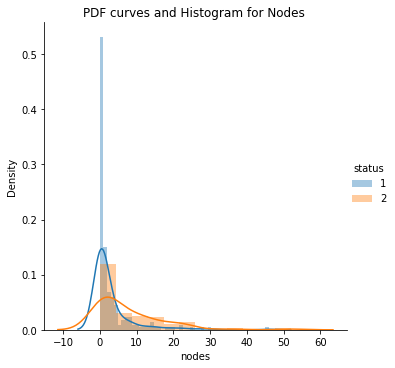

In [28]:
sns.FacetGrid(df, hue="status", size=5) \
   .map(sns.distplot, "nodes") \
   .add_legend()
plt.title("PDF curves and Histogram for Nodes ")
plt.show();

###Observation
With increasing number of lymph nodes the chances of survival of patients is gradually decreasing.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


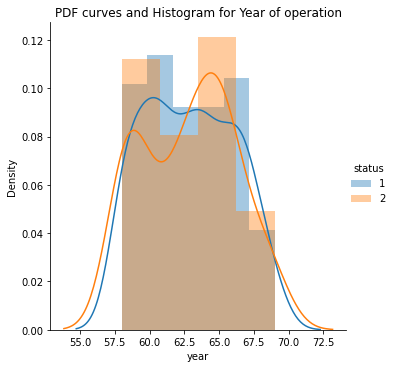

In [31]:
sns.FacetGrid(df, hue="status", size=5) \
   .map(sns.distplot, "year") \
   .add_legend()
plt.title("PDF curves and Histogram for Year of operation")
plt.show();

###Observation
The patients whose year of operation was between 58 and 63 had comparatively greater chances of survival than patients whose year of opearation was between 63 and 66 and during later years had 50-50 chances of survival. 

PDF and CDF curves for Age

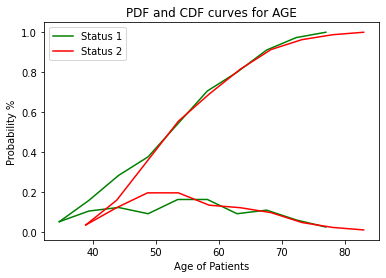

In [35]:
counts, bin_edges = np.histogram(s1['age'], bins=10,density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,color="green", label="Status 1")
plt.plot(bin_edges[1:], cdf,color="green")

counts, bin_edges = np.histogram(s2['age'], bins=10,density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,color="red",label="Status 2")
plt.plot(bin_edges[1:], cdf,color="red")


plt.xlabel("Age of Patients")
plt.ylabel("Probability %")
plt.legend()
plt.title("PDF and CDF curves for AGE")
plt.show();

PDF and CDF for Nodes

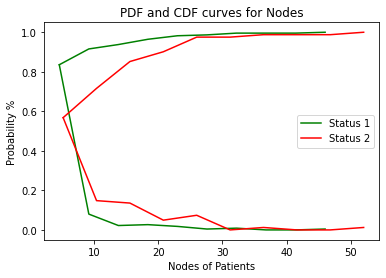

In [36]:
counts, bin_edges = np.histogram(s1['nodes'], bins=10,density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,color="green", label="Status 1")
plt.plot(bin_edges[1:], cdf,color="green")

counts, bin_edges = np.histogram(s2['nodes'], bins=10,density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,color="red",label="Status 2")
plt.plot(bin_edges[1:], cdf,color="red")


plt.xlabel("Nodes of Patients")
plt.ylabel("Probability %")
plt.legend()
plt.title("PDF and CDF curves for Nodes")
plt.show();

PDF and CDF for Year of Operation

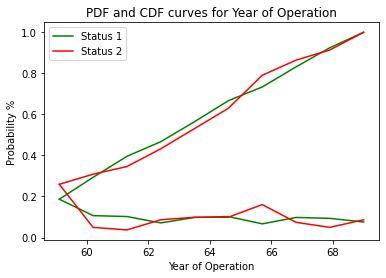

In [37]:
counts, bin_edges = np.histogram(s1['year'], bins=10,density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,color="green", label="Status 1")
plt.plot(bin_edges[1:], cdf,color="green")

counts, bin_edges = np.histogram(s2['year'], bins=10,density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,color="red",label="Status 2")
plt.plot(bin_edges[1:], cdf,color="red")


plt.xlabel("Year of Operation")
plt.ylabel("Probability %")
plt.legend()
plt.title("PDF and CDF curves for Year of Operation")
plt.show();

###Box Plots

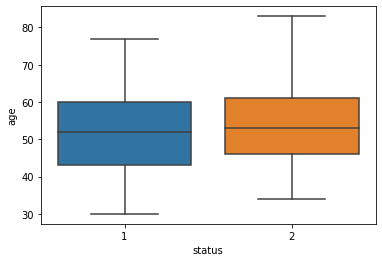

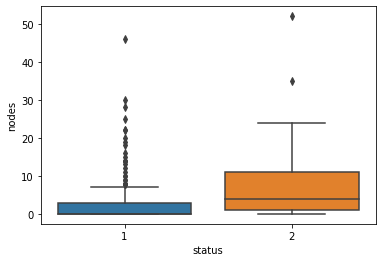

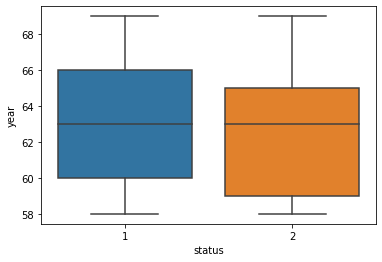

In [40]:
sns.boxplot(x="status",y="age",data=df)
plt.show()

sns.boxplot(x="status",y="nodes",data=df)
plt.show()

sns.boxplot(x="status",y="year",data=df)
plt.show()

###Obseravtion
Patients having age less than 30 survived their operation and patients having age greater than 78 didn't survive.

The number of patients having nodes greater than 8 are very less and thus most of them are considered as outliers.

###Violin Plots

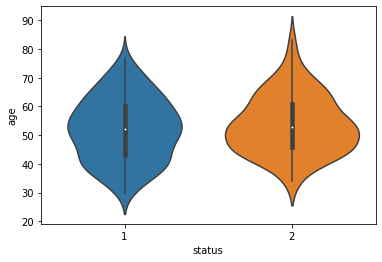

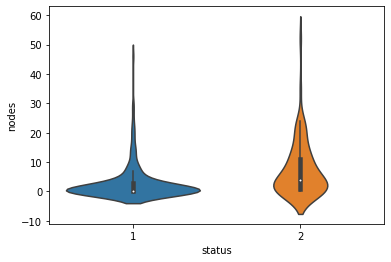

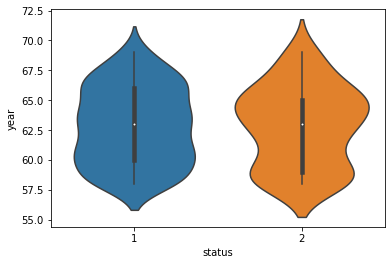

In [41]:
sns.violinplot(x="status",y="age",data=df)
plt.show()

sns.violinplot(x="status",y="nodes",data=df)
plt.show()

sns.violinplot(x="status",y="year",data=df)
plt.show()

###Bivariate Analysis

Pair Plots

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


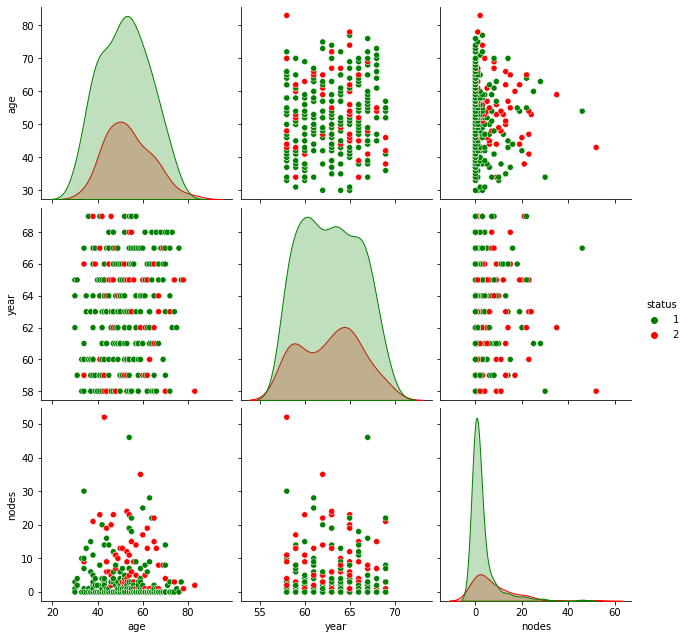

In [63]:
sns.pairplot(df,hue="status",size=3,palette=["green","red"])
plt.show()

###Observation
These plots shows very high overlapping and distinguishing based on any 2 attributes is very less unlikely.

2-D Scatter plots

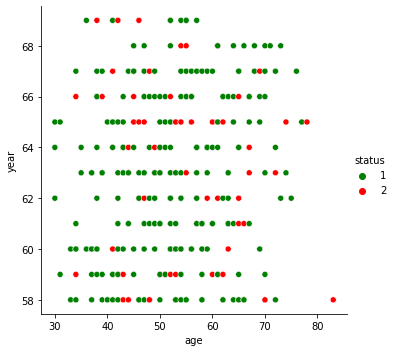

In [47]:
sns.relplot(kind="scatter",x="age",y="year",data=df,hue="status",palette=['green','red'])
plt.show()

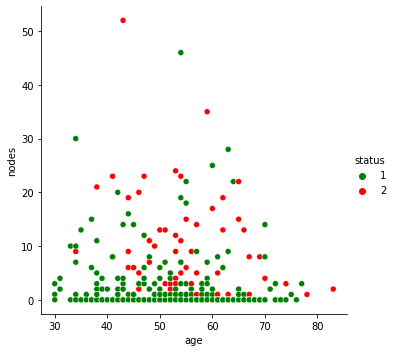

In [48]:
sns.relplot(kind="scatter",x="age",y="nodes",data=df,hue="status",palette=['green','red'])
plt.show()

###Observation
Less no. of nodes means higher chances of survival

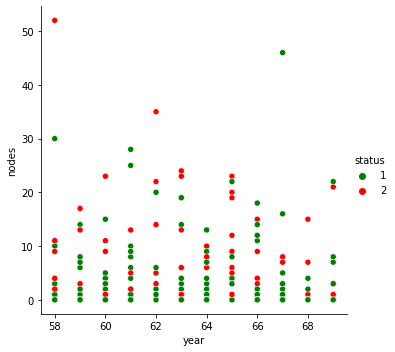

In [50]:
sns.relplot(kind="scatter",x="year",y="nodes",data=df,hue="status",palette=['green','red'])
plt.show()

###MultiVariate Analysis

Contour Plots

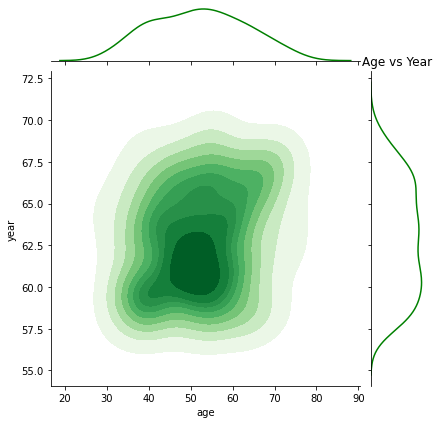

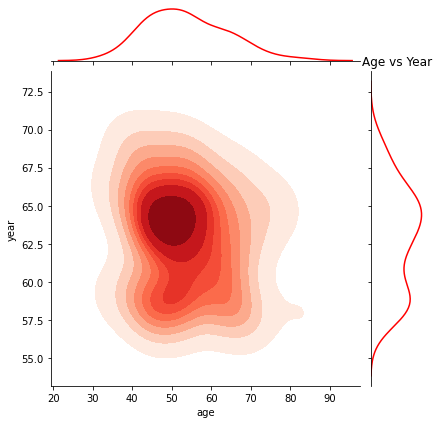

In [58]:
sns.jointplot(x="age",y="year",data=s1,kind="kde",cmap="Greens",color="green",shade=True)
plt.title("Age vs Year")
sns.jointplot(x="age",y="year",data=s2,kind="kde",cmap="Reds",color="red",shade=True)
plt.title("Age vs Year")
plt.show()

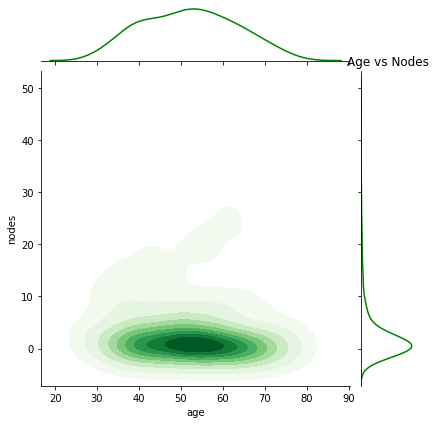

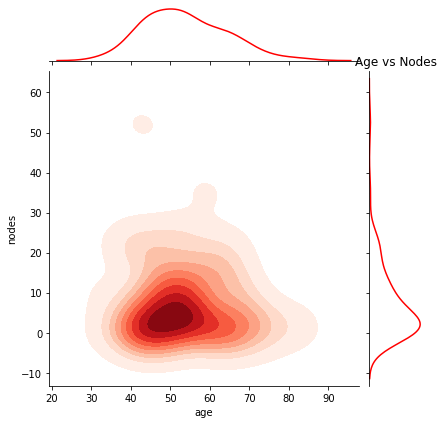

In [59]:
sns.jointplot(x="age",y="nodes",data=s1,kind="kde",cmap="Greens",color="green",shade=True)
plt.title("Age vs Nodes")
sns.jointplot(x="age",y="nodes",data=s2,kind="kde",cmap="Reds",color="red",shade=True)
plt.title("Age vs Nodes")
plt.show()

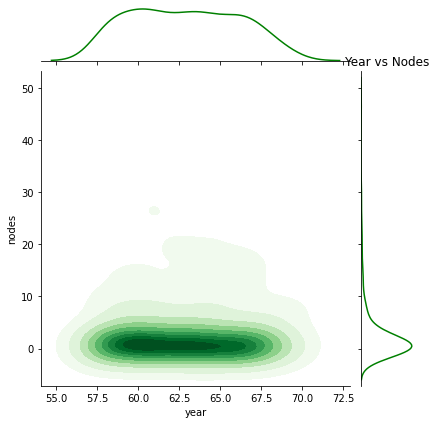

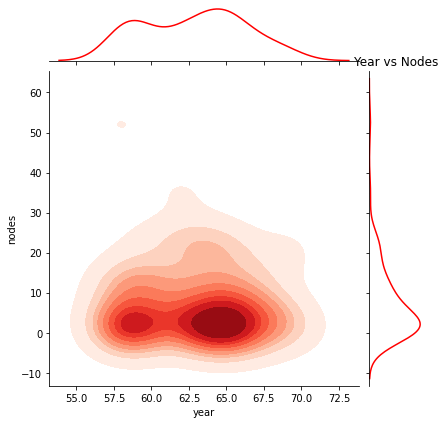

In [61]:
sns.jointplot(x="year",y="nodes",data=s1,kind="kde",cmap="Greens",color="green",shade=True)
plt.title("Year vs Nodes")
sns.jointplot(x="year",y="nodes",data=s2,kind="kde",cmap="Reds",color="red",shade=True)
plt.title("Year vs Nodes")
plt.show()

##Final Observations:
1.The Patients survived- 225 , then the one who died -81 after 5 years of surgery.

2.The average value of age for the patients who survived after the surgery is 52.01

3.The average no of nodes for the paients who survived after the surgery is 2.79

4.75% of people who survived have age less then 60 years of age.

5.No one above age of 77 survived.

6.No one with node count above 46 survived.

7.The average no of nodes in person who could not survive was 7.4.

8.Patients with age less then 33 have 100% survived.

9.Patients with age greater then 80 could not survive.

10.Lymph nodes greater then 50 could not survive.

11.With increase in node count the no of survivals is always less.

12.It can be observed from the above graph that the people with ages lower than 38 usually survive after the brest cancer surgery and from 38 to 42 they relatively higher chances of survival.

13.People with year of surgery around 60's have higher survival chances then people with surgery,s around 65.

14.50 percentile of patients who survived(status=1) have node value equal to 0.

15.Any two attributes can't decide whether a person will survive or not as the pairplots and scatterplots are highly overlapping.